In [1]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import rc
rc('font',family='New Gulim')

Text(0,0.5,'특성 1')

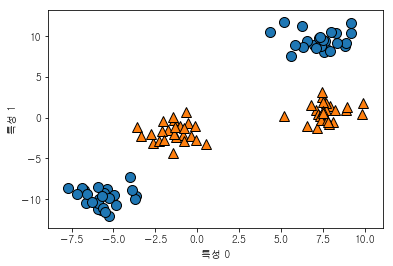

In [2]:
from sklearn.datasets import make_blobs
X,y=make_blobs(centers=4, random_state=8)
y=y%2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0,0.5,'특성 1')

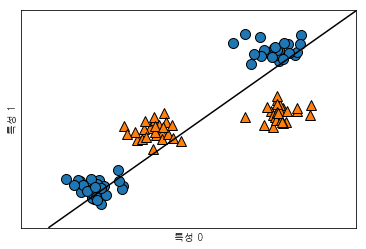

In [3]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5,0,'특성1 ** 2')

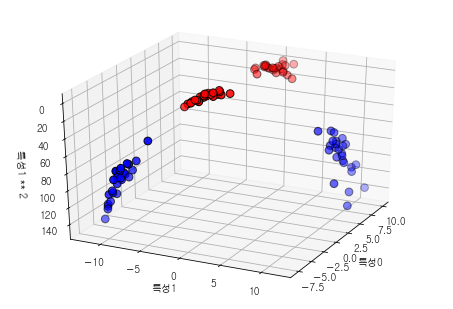

In [4]:
X_new=np.hstack([X,X[:,1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure=plt.figure()

ax=Axes3D(figure, elev=-152, azim=-26)
mask=y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask,2], c='b',cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask,2], c='r',cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")


Text(0.5,0,'특성1 ** 2')

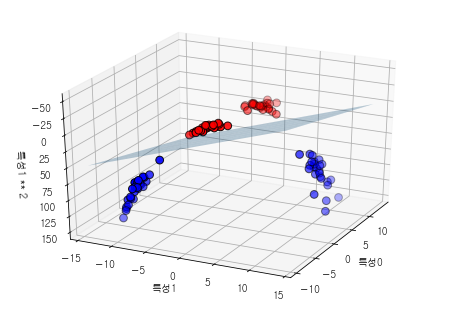

In [5]:
linear_svm_3d=LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure=plt.figure()

ax=Axes3D(figure, elev=-152, azim=-26)
xx=np.linspace(X_new[:,0].min() -2, X_new[:,1].max()+2, 50)
yy=np.linspace(X_new[:,1].min() -2, X_new[:,1].max()+2, 50)

XX,YY= np.meshgrid(xx,yy)
ZZ=(coef[0] * XX + coef[1] *YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask,2], c='b',cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask,2], c='r',cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")


Text(0,0.5,'특성 1')

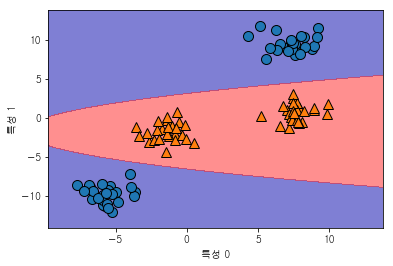

In [6]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0,0.5,'특성 1')

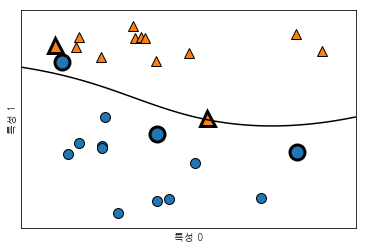

In [7]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10, gamma=0.1).fit(X,y)

mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv=svm.support_vectors_
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

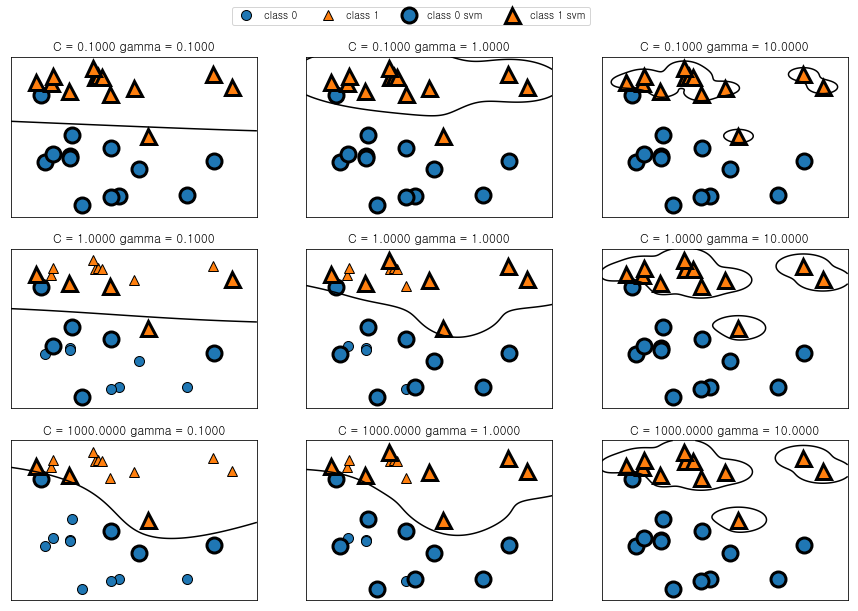

In [8]:
fig, axes=plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0,0].legend(['class 0','class 1','class 0 svm','class 1 svm'], ncol=4, loc=(.9, 1.2))

In [9]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc=SVC().fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


Text(0,0.5,'feature size')

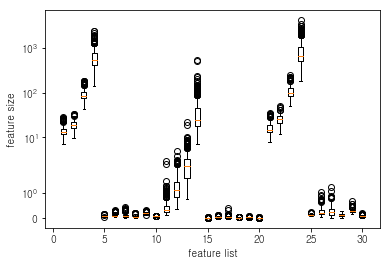

In [10]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("feature list")
plt.ylabel("feature size")

In [11]:
min_on_training=X_train.min(axis=0)
range_on_training= (X_train - min_on_training).max(axis=0)
X_train_scaled=(X_train - min_on_training)/range_on_training
print("feature min",X_train_scaled.min(axis=0))
print("feature max",X_train_scaled.max(axis=0))

feature min [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
feature max [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))


훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951
